<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/4_Integraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Caso de Estudio**

Una empresa del sector bancario (Bancolombia) ha comprado tres FINTECH (FINTECH1, FINTECH2, FINTECH3). Bancolombia desea saber cuales clientes son susceptibles de hacer parte de su cartera de créditos. Para eso quiere hacer una integración de datos para estos clientes nuevos potenciales, utilizando como referencia la variable Ingresos.
Las variables de trabajo son los siguientes:
* Ingresos: Es una variable que determina los ingresos de una persona por efecto de sus actividades comerciales.

0. Se cargan las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

1. Se cargan los datos de Integración

In [ ]:
nxl="/content/3. DB_Fintechs (USD)_Integración.xlsx"
XDBo=pd.read_excel(nxl,sheet_name=0)
XDBF1=pd.read_excel(nxl,sheet_name=1)

XDo=np.array(XDBo["Ingresos"])
XDF1=np.array(XDBF1["Ingresos"])

2. Se calcula las métricas estadísticas

In [ ]:
uo=np.mean(XDo);uf=np.mean(XDF1)
sigmao=np.std(XDo);sigmaf1=np.std(XDF1)
print("El coeficiente de asimetría Original:", skew(XDo))
print("El coeficiente de curtosis Original:", kurtosis(XDo))

#Se procede con la integración de los externos

XDInt=[]
for k in range(len(XDF1)):
  print(XDF1[k])
  x=XDF1[k] #Dato a Integrar
  VPo=np.exp(-0.5*((x-uo)/sigmao)**2)
  VPf1=np.exp(-0.5*((x-uf)/sigmaf1)**2)

  if VPf1<VPo and VPo>0.95: #0.9 asegura que los datos sea confiables con respecto a los datos observados
    XDInt.append(x)
    print("El dato de integración esta en la fila;", k)
  else:
    print("El dato no se integra;", k)

El coeficiente de asimetría Original: [0.82593437]
El coeficiente de curtosis Original: [0.44725328]
153.2055
El dato no se integra; 0
105.00425
El dato no se integra; 1
185.24475
El dato no se integra; 2
609.928
El dato no se integra; 3
344.889
El dato no se integra; 4
1248.617
El dato no se integra; 5
157.64225
El dato no se integra; 6
1490.9735
El dato no se integra; 7
984.91125
El dato no se integra; 8
1239.47525
El dato no se integra; 9
904.17125
El dato no se integra; 10
960.074
El dato no se integra; 11
290.16175
El dato no se integra; 12
1385.92925
El dato no se integra; 13
158.028
El dato no se integra; 14
460.38
El dato no se integra; 15
1303.9315
El dato no se integra; 16
393.74025
El dato no se integra; 17
762.31375
El dato de integración esta en la fila; 18
426.9765
El dato no se integra; 19
329.69175
El dato no se integra; 20
572.70325
El dato no se integra; 21
2.7555
El dato no se integra; 22
417.59925
El dato no se integra; 23
554.745
El dato no se integra; 24
706.635
E

3. Se procede con la integración de datos

In [ ]:
XDo=np.array(XDo).reshape(-1,1) #Quitar estructura al array
XDInt=np.array(XDInt).reshape(-1,1) #Quitar estructura al array

XDT=np.concatenate((XDo,XDInt),axis=0) #Base da datos total

#El número de datos integrados es:
nint=len(XDT)-len(XDo)
print("El número de datos integrados es:", nint)

#Evaluamos las métricas
print("El coeficiente de asimetría para los Observados:", skew(XDo))
print("El coeficiente de curtosis para los Observados:", kurtosis(XDo))
print("El coeficiente de asimetría para los Integrados:", skew(XDT))
print("El coeficiente de curtosis para los Integrados:", kurtosis(XDT))


El número de datos integrados es: 199
El coeficiente de asimetría para los Observados: [0.82593437]
El coeficiente de curtosis para los Observados: [0.44725328]
El coeficiente de asimetría para los Integrados: [0.82423155]
El coeficiente de curtosis para los Integrados: [0.81864666]


4. Se gráfican los datos

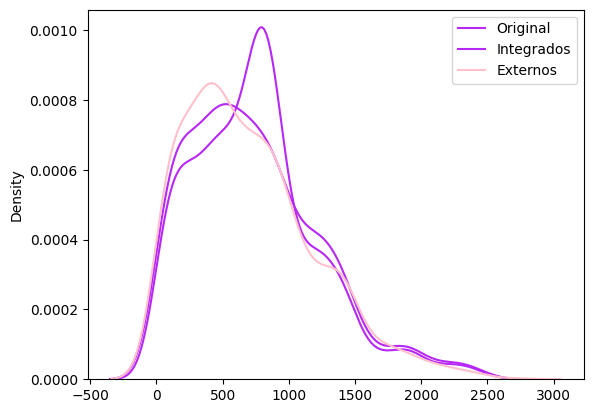

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.set_palette(["#B727F5", "#FFC0CB", "pink"]) # Set a custom color palette
sns.kdeplot(XDo, label="Original")
sns.kdeplot(XDT, label="Integrados")
sns.kdeplot(XDF1, label="Externos")
plt.legend()
plt.show()